# Proyecto Mineria de Datos
## Indice de Precios al Consumidor
---
**Integrantes**
- Maria Marta Ramirez Gil
- Gustavo Andres Gonzalez Pineda 
- Diego Alberto Leiva Pérez 
- José Pablo Orellana Orellana 
- Gabriel Estuardo García Donis 
---

### Introducción

El Índice de Precios al Consumidor (IPC) mide la evolución de los precios de una canasta de bienes y servicios representativa del patrón de consumo de los habitantes de cada país.
El IPC es fundamental para entender la economía del país, ya que proporciona una visión clara de la inflación del país, un fenómeno que afecta de forma directa el poder adquisitivo de su población, y por consiguiente su calidad de vida.

Al analizar el histórico del IPC de Guatemala, se esperan poder identificar tendencias y patrones de evolución de los precios que afectan a diferentes regiones de la república y sectores económicos. 

El Instituto Nacional de Estadística (INE) desglosa este índice por productos y regiones geográficas, asi como por mes y año.

---

## Análisis Exploratorio

### Exploración Inicial

**Importar Librerias**

In [1]:
import os

# Manipulacion de datos
import pandas as pd
import numpy as np

# Librerias para visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizacion de strings
import unidecode

# Libreria re para manejo de expresiones regulares
import re

# Librerias para pre procesamiento de datos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Librerias para clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Libreria de metricas
from sklearn.metrics import silhouette_score

**Cargar los Datasets y unificarlos**

In [2]:
path = './Data/'

# Listado de dataframes a concatenar
data_frames = []

# Listado de archivos excel en el directorio
xls_files = [f for f in os.listdir(path) if f.endswith('.xls')]

# Verificar si hay archivos excel en el directorio
if xls_files:
    # Obtener el nombre de las columnas del primer archivo
    first_file_path = os.path.join(path, xls_files[0])
    first_df = pd.read_excel(first_file_path)
    column_names = first_df.columns.tolist()

    # Agregar el dataframe a la lista
    data_frames.append(first_df)

    # Procesar los archivos restantes
    for filename in xls_files[1:]:
        # Construir la ruta completa al archivo
        file_path = os.path.join(path, filename)
        # Leer el archivo excel
        df = pd.read_excel(file_path)
        # Renombrar las columnas
        df.columns = column_names
        # Agregar el dataframe a la lista
        data_frames.append(df)

    # Concatenar todos los dfs en uno solo
    data = pd.concat(data_frames, ignore_index=True)

**Visualizar estructura e información general del dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45844 entries, 0 to 45843
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Año          45844 non-null  int64  
 1   Mes          45844 non-null  object 
 2   Código       45844 non-null  int64  
 3   Descripción  45844 non-null  object 
 4   Rep.         45844 non-null  float64
 5   Reg. I       45844 non-null  float64
 6   Reg. II      45844 non-null  float64
 7   Reg. III     45844 non-null  float64
 8   Reg. IV      45844 non-null  float64
 9   Reg. V       45844 non-null  float64
 10  Reg. VI      45844 non-null  float64
 11  Reg. VII     45844 non-null  float64
 12  Reg. VIII    45844 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 4.5+ MB


In [4]:
data.shape

(45844, 13)

En el dataframe existen 13 columnas (características) y 45,844 observaciones (registros)

In [5]:
data.head()

,Año,Mes,Código,Descripción,Rep.,Reg. I,Reg. II,Reg. III,Reg. IV,Reg. V,Reg. VI,Reg. VII,Reg. VIII
0,2010,Diciembre,0,INDICE GENERAL,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,2010,Diciembre,1,ALIMENTOS Y BEBIDAS NO ALCOHÓLICAS ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,2010,Diciembre,111101,ARROZ ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,2010,Diciembre,111201,HARINA ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,2010,Diciembre,111202,MAÍZ ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [6]:
data.tail()

,Año,Mes,Código,Descripción,Rep.,Reg. I,Reg. II,Reg. III,Reg. IV,Reg. V,Reg. VI,Reg. VII,Reg. VIII
45839,2023,Diciembre,1251101,Servicio de emisión de certificado de todo tip...,119.54,119.54,119.54,119.54,119.54,119.54,119.54,119.54,119.54
45840,2023,Diciembre,1251102,Servicio de fotocopiado ...,141.12,143.54,120.12,144.41,143.44,138.73,122.27,138.65,111.81
45841,2023,Diciembre,1251103,Servicio notarial ...,115.15,122.87,106.99,115.77,107.75,114.70,110.98,109.23,114.95
45842,2023,Diciembre,1251104,Servicio funerario ...,133.04,131.35,110.95,164.32,154.37,130.88,116.95,121.42,117.80
45843,2023,Diciembre,1251105,Mantenimiento de condominio ...,128.95,128.95,128.95,0.00,128.95,0.00,128.95,0.00,0.00


**Variables Identificadas:**
- Año: Representa el año en que se recopilaron los datos.
- Mes: Indica el mes correspondiente a cada registro.
- Código: Identificador numérico para cada producto o categoría de productos.
- Descripción: Detalle sobre el producto o categoría de productos al que se refiere el índice de precios.
- Rep.: Valor representativo para todo el país
- Reg. I: Valor representativo de la región Metropolitana.
- Reg. II: Valor representativo de la región Norte.
- Reg. III: Valor representativo de la región Nororiental.
- Reg. IV: Valor representativo de la región Suroriental.
- Reg. V: Valor representativo de la región Central.
- Reg. VI: Valor representativo de la región Suroccidental.
- Reg. VII: Valor representativo de la región Noroccidental.
- Reg. VIII: Valor representativo de la región Petén.

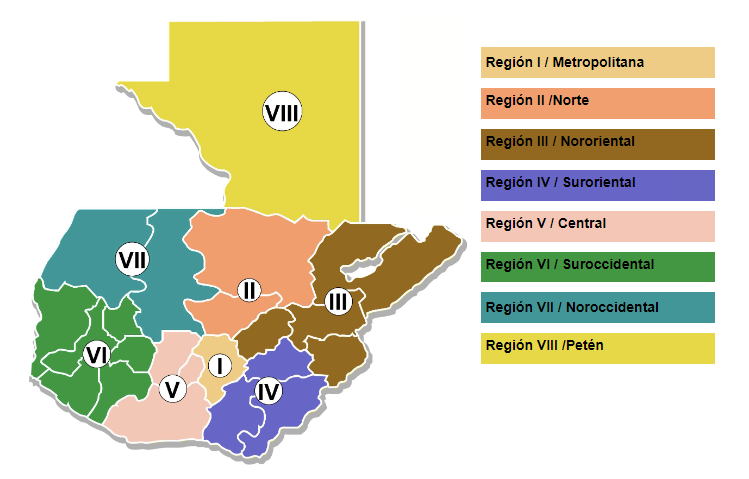

**Tipos de variables**

Categóricas:
- año
- mes
- código
- descripción

Nota: Aunque tanto el año como el código están compuestos por números, no se deben evaluar como variables numéricas, ya que su naturaleza dentro de los datos es categórica. Por consiguiente, se tratan como tales para el análisis.


Numéricas:
- república
- 8 regiones

### Preprocesamiento y Limpieza

**Verificar existencia de valores nulos**

In [7]:
data.isnull().sum()

Año            0
Mes            0
Código         0
Descripción    0
Rep.           0
Reg. I         0
Reg. II        0
Reg. III       0
Reg. IV        0
Reg. V         0
Reg. VI        0
Reg. VII       0
Reg. VIII      0
dtype: int64

No hay valores faltantes o nulos.
De haber sido el caso contrario, entonces habría sido necesario analizar cuál es la proporción de nulos, y basado en ello eliminarlos (de ser una proporción mínima), de lo contrario sería necesario imputar 0 para variables numéricas, o imputar la moda para variables categóricas.

**Renombrar columnas para mejor legibilidad**

Se modifican los nombres de las columnas a términos más simples y concisos, mejorando así la claridad y facilitando el análisis futuro.

In [8]:
new_names = {
    'Año': 'anio',
    'Mes': 'mes',
    'Código': 'codigo',
    'Descripción': 'descripcion',
    'Rep.': 'pais',
    'Reg. I': 'region1',
    'Reg. II': 'region2',
    'Reg. III': 'region3',
    'Reg. IV': 'region4',
    'Reg. V': 'region5',
    'Reg. VI': 'region6',
    'Reg. VII': 'region7',
    'Reg. VIII': 'region8',
}

data.rename(columns=new_names, inplace=True)

**Estandarizacion de texto**

Este paso tiene como objetivo prevenir futuras discrepancias al filtrar por código o descripción, evitando así las complicaciones que puedan surgir debido a variaciones en la redacción.

In [9]:
def standarize_str(input_str):
    """
    Función que toma un string y realiza estandarización removiendo tildes 
    y convirtiendolo a letras minúsculas.

    Parameters:
    input_str (str): El string a procesar.

    Returns:
    str: El string estandarizado (sin tildes y en minúscula).
    """
    standar_str = unidecode.unidecode(input_str)
    standar_str = standar_str.lower()
    return standar_str

In [10]:
# Columnas categoricas con strings a normalizar
colums = ['mes','descripcion']

# Normalizar strings
for col in colums:
    data[col] = data[col].apply(standarize_str)

In [11]:
# Columnas numericas que se deben convertir a categoricas
colums = ['anio','codigo']

# Convertir a categoricas
for col in colums:
    data[col] = data[col].astype(str)

# Rellenar con ceros a la izquierda en la columna codigo
# Los codigos son de 7 digitos
data['codigo'] = data['codigo'].str.zfill(7)

**Columnas con datos temporales**

Se fusionan las columnas relacionadas con información temporal, como año y mes, en una única columna denominada "fecha", con el fin de simplificar el análisis temporal de los datos.

In [12]:
meses = {
    'enero': 'January',
    'febrero': 'February',
    'marzo': 'March',
    'abril': 'April',
    'mayo': 'May',
    'junio': 'June',
    'julio': 'July',
    'agosto': 'August',
    'septiembre': 'September',
    'octubre': 'October',
    'noviembre': 'November',
    'diciembre': 'December'
}

# Convierte los nombres de los meses a inglés
data['mes'] = data['mes'].apply(lambda x: meses[x])

# Combina las columnas 'Año' y 'Mes' en una nueva columna 'Fecha'
# La fecha resultante siempre tendra dia 01 por defecto
data['fecha'] = pd.to_datetime(data['anio'].astype(str) + '-' + data['mes'], format='%Y-%B')

# Elimina las columnas 'Año' y 'Mes'
data.drop(columns=['anio', 'mes'], inplace=True)

**Validación de preprocesamiento**

In [13]:
data.head()

,codigo,descripcion,pais,region1,region2,region3,region4,region5,region6,region7,region8,fecha
0,0000000,indice general,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2010-12-01
1,0000001,alimentos y bebidas no alcoholicas ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2010-12-01
2,0111101,arroz ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2010-12-01
3,0111201,harina ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2010-12-01
4,0111202,maiz ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2010-12-01


In [14]:
data.tail()

,codigo,descripcion,pais,region1,region2,region3,region4,region5,region6,region7,region8,fecha
45839,1251101,servicio de emision de certificado de todo tip...,119.54,119.54,119.54,119.54,119.54,119.54,119.54,119.54,119.54,2023-12-01
45840,1251102,servicio de fotocopiado ...,141.12,143.54,120.12,144.41,143.44,138.73,122.27,138.65,111.81,2023-12-01
45841,1251103,servicio notarial ...,115.15,122.87,106.99,115.77,107.75,114.70,110.98,109.23,114.95,2023-12-01
45842,1251104,servicio funerario ...,133.04,131.35,110.95,164.32,154.37,130.88,116.95,121.42,117.80,2023-12-01
45843,1251105,mantenimiento de condominio ...,128.95,128.95,128.95,0.00,128.95,0.00,128.95,0.00,0.00,2023-12-01


**Verificación de descripciones y códigos**

In [15]:
nums = np.arange(13)
nums = np.array([str(num).zfill(7) for num in nums])

for num in nums:
    # Filtrar registros que tienen el código 
    categoria_producto = data[data['codigo'] == num]
    # Verificar si todos estos registros tienen la misma descripción
    descripcion_unica = categoria_producto['descripcion'].nunique() == 1
    print(f'Todos los registros con código {num} tienen la misma descripción: {descripcion_unica}')
    print(f"{categoria_producto['descripcion'].value_counts()}")
    print('\n')

Todos los registros con código 0000000 tienen la misma descripción: True
descripcion
indice general    157
Name: count, dtype: int64


Todos los registros con código 0000001 tienen la misma descripción: True
descripcion
alimentos y bebidas no alcoholicas                                                                      157
Name: count, dtype: int64


Todos los registros con código 0000002 tienen la misma descripción: True
descripcion
bebidas alcoholicas y tabaco                                                                            157
Name: count, dtype: int64


Todos los registros con código 0000003 tienen la misma descripción: True
descripcion
prendas de vestir y calzado                                                                             157
Name: count, dtype: int64


Todos los registros con código 0000004 tienen la misma descripción: True
descripcion
vivienda, agua, electricidad, gas y otros combustibles                                                  157
Name: cou

El resultado indica que, tras la estandarización, los códigos generales son coherentes para cada registro, lo que ahora permite realizar un filtrado sin enfrentar problemas de discrepancias.

In [16]:
# Iterar a través de las categorías generales
for i in range(1, 13):  # Del 1 al 12
    categoria_general = f"{i:07d}"  # Formatea el número como un string de 7 dígitos
    
    # Buscar la descripción de la categoría general
    descripcion_categoria_general = data.loc[data['codigo'] == categoria_general, 'descripcion'].values[0]
    
    print(f"Categoría General {i:02d}: {descripcion_categoria_general}")
    
    # Filtrar los códigos que pertenecen a esta categoría general
    patron = f"{i:02d}"
    subset = data[data['codigo'].str.startswith(patron) & (data['codigo'] != categoria_general)]
    
    # Inicializar un conjunto para rastrear los códigos impresos
    codigos_impresos = set()

    # Imprimir los códigos y descripciones pertenecientes a esta categoría general
    for _, row in subset.iterrows():
        if row['codigo'] not in codigos_impresos:
            print(f"{row['codigo']} : {row['descripcion']}")
            codigos_impresos.add(row['codigo'])  # Agregar el código al conjunto para evitar repeticiones
    
    print("\n")  # Añadir una línea en blanco para separar las categorías

Categoría General 01: alimentos y bebidas no alcoholicas                                                                  
0111101 : arroz                                                                                               
0111201 : harina                                                                                              
0111202 : maiz                                                                                                
0111203 : cereales                                                                                            
0111301 : pan                                                                                                 
0111302 : galletas                                                                                            
0111303 : productos de repostreria                                                                            
0111401 : pastas                                                                                    

### Análisis General

**Estadísticas descriptivas de las variables numéricas**

In [17]:
data.describe()

,pais,region1,region2,region3,region4,region5,region6,region7,region8,fecha
count,45844.000000,45844.000000,45844.000000,45844.000000,45844.000000,45844.000000,45844.000000,45844.000000,45844.000000,45844
mean,153.735402,133.157832,203.676301,137.410832,308.069631,138.114942,130.688293,169.538936,157.475185,2017-06-01 02:08:24.458598656
min,42.450000,38.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010-12-01 00:00:00
25%,106.610000,105.730000,104.910000,105.190000,104.640000,104.580000,103.837500,102.090000,103.510000,2014-03-01 00:00:00
50%,114.740000,113.940000,113.680000,115.760000,116.900000,114.580000,110.950000,110.140000,111.180000,2017-06-01 00:00:00
75%,128.100000,130.030000,129.060000,130.990000,137.252500,128.930000,121.630000,126.410000,123.515000,2020-09-01 00:00:00
max,3992.220000,2209.690000,9879.290000,5271.690000,68850.730000,2168.580000,2168.580000,6324.900000,6830.190000,2023-12-01 00:00:00
std,195.063278,82.080171,546.731376,151.192754,1974.508259,111.310150,101.054421,306.396731,315.405011,NaN


**Observaciones**

1. **Conteo:** El número de observaciones es constante a través de las regiones, con un total de 45,844 registros para cada una. Esto indica una uniformidad en la cantidad de datos recogidos por región.

2. **Media:** Las medias de las regiones varían considerablemente, desde 133.16 en la región 1 hasta 308.07 en la región 4, lo que sugiere diferencias significativas en los valores registrados en cada región. La media más alta en la región 4 podría indicar una tendencia o condiciones distintas en comparación con las otras regiones.

3. **Mínimo:** La presencia de ceros en algunas regiones podría indicar la ausencia de movimiento en los precios de algun producto o algún evento no medido en esos períodos o regiones.

4. **Cuartiles:** Los cuartiles muestran la distribución de los datos dentro de cada región. Por ejemplo, la mediana (50%) varía menos entre regiones en comparación con la media, lo que sugiere la presencia de valores atípicos extremos que afectan la media, especialmente evidente en la región 4.

5. **Máximo:** Los valores máximos varían drásticamente, desde 3992.22 en la región 1 hasta 68850.73 en la región 4, lo que indica una variabilidad significativa y la presencia de valores atípicos extremos, particularmente en la región 4, en donde un valor tan alto parece indicar un error.

6. **Desviación estándar:** La variabilidad de los datos, medida por la desviación estándar, es notablemente más alta en la región 4 en comparación con las otras regiones. Esto es consistente con la observación de la media y los valores máximos y sugiere una mayor dispersión de los datos en la región 4.

7. **Fechas:** La fecha mínima es el 1 de diciembre de 2010 y la máxima es el 1 de diciembre de 2023, lo que indica que los datos abarcan un período de 13 años. Los cuartiles de la fecha sugieren una distribución uniforme de los registros a lo largo del tiempo.

**Distribuciones**

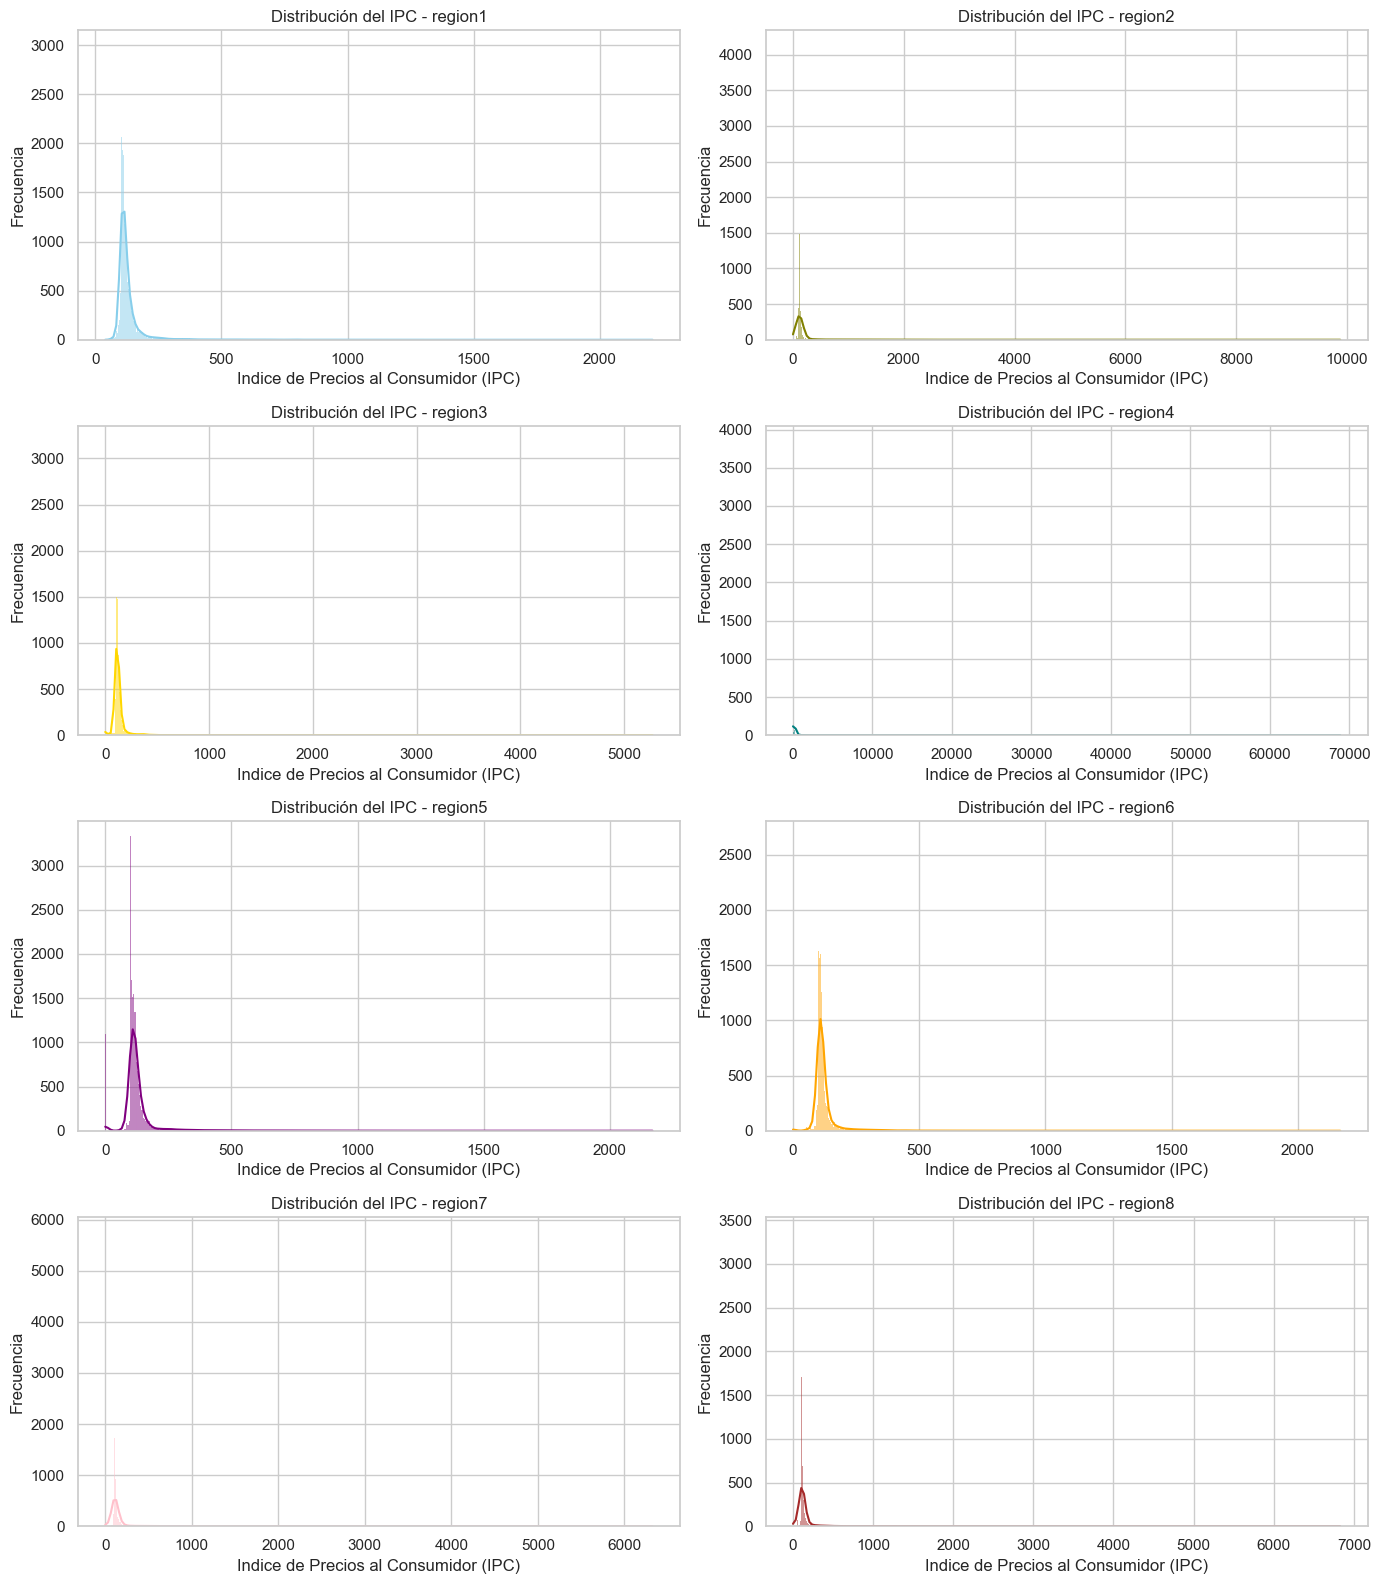

In [18]:
# Configuración de los gráficos
sns.set_theme(style="whitegrid")

# Crear una figura para múltiples gráficos
fig, axes = plt.subplots(4, 2, figsize=(14, 16))  # Ajusta según la cantidad de regiones

# Histograma para cada región
regiones = ['region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7', 'region8']
colors = ['skyblue', 'olive', 'gold', 'teal', 'purple', 'orange', 'pink', 'brown']  # Colores para cada región

for i, (region, color) in enumerate(zip(regiones, colors)):
    ax = axes[i // 2, i % 2]  # Determina la posición del subplot
    sns.histplot(data[region], kde=True, color=color, ax=ax)
    ax.set_title(f'Distribución del IPC - {region}')
    ax.set_xlabel('Indice de Precios al Consumidor (IPC)')  # Set x-axis label
    ax.set_ylabel('Frecuencia')  # Set y-axis label

plt.tight_layout()
plt.show()

**Observaciones**
- Presencia de atípicos: En varias regiones, especialmente en la región 4, se observan valores muy altos que se desvían significativamente del resto de los datos, lo cual sugiere la presencia de valores erroneos o atípicos.

- Distribuciones Sesgadas: Todas las regiones muestran distribuciones sesgadas, algunas hacia la derecha (regiones 1, 3, 5, 7, 8) y otras con un sesgo aún más extremo y valores atípicos muy alejados (regiones 2, 4, 6). Esto sugiere que en todas las regiones el IPC tiene un rango de valores que no es uniforme y está influenciado por factores que varían regionalmente.

**Valores Atípicos**

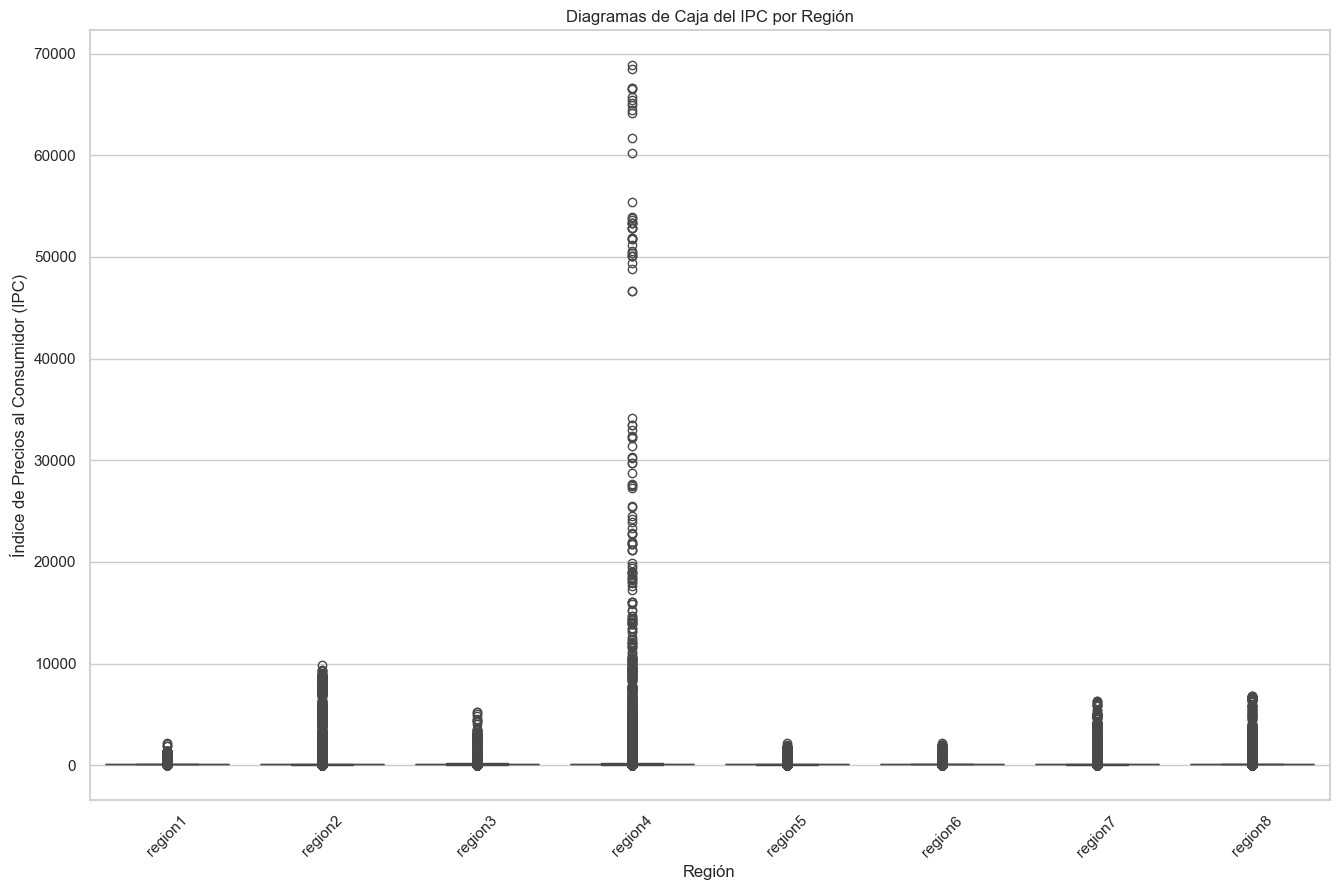

In [19]:
# Configuración del estilo de los gráficos
sns.set_theme(style="whitegrid")

# Diagramas de caja para cada región
plt.figure(figsize=(16, 10))
sns.boxplot(data=data[['region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7', 'region8']])
plt.title('Diagramas de Caja del IPC por Región')
plt.ylabel('Índice de Precios al Consumidor (IPC)')
plt.xlabel('Región')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

**Observaciones**
- Atípicos: Casi todas las regiones presentan valores atípicos, siendo la región 4 la que tiene la mayor cantidad y los más extremos llegando hasta más de 60,000.
  
- Medianas: Las medianas de las regiones, excepto la región 4, son consistentes, lo que indica una mediana de IPC similar a través de estas distintas partes del país.

- Variabilidad: La región 4 muestra una variabilidad excepcionalmente alta, mientras que las otras regiones tienen una variabilidad más contenida.

- Consistencia: Excluyendo la región 4, las demás regiones tienen distribuciones más estrechas y consistentes del IPC.

**Manejo de Valores atípicos**

Se busca identificar y eliminar registros con valores atípicos en cualquier región o a nivel de país, asegurando así la consistencia y precisión del análisis al descartar datos extremos que podrían distorsionar los resultados.

In [20]:
# Evaluando la categoría con el valor máximo en la región 4

# Paso 1: Encontrar el código de la categoría con el valor máximo en la región 4
max_value_region4 = data['region4'].max()
registro_max_region4 = data[data['region4'] == max_value_region4].iloc[0]
codigo_max_region4 = registro_max_region4['codigo']

# También extraer la descripción para este registro
descripcion_max_region4 = registro_max_region4['descripcion']

# Paso 2: Filtrar todos los registros con ese código
registros_categoria_max = data[data['codigo'] == codigo_max_region4]

# Imprimir el código y la descripción del valor máximo
print(f"Código con valor máximo en región 4: {codigo_max_region4}")
print(f"Descripción: {descripcion_max_region4}")

# Paso 3: Realizar estadísticas descriptivas de estos registros
estadisticas_descriptivas = registros_categoria_max.describe()

# Imprimir las estadísticas descriptivas
estadisticas_descriptivas

Código con valor máximo en región 4: 0119203
Descripción: chiles picantes                                                                                     


,pais,region1,region2,region3,region4,region5,region6,region7,region8,fecha
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157
mean,220.133312,527.875223,188.344841,231.842166,20517.303121,271.230892,128.808217,106.756815,617.091720,2017-06-01 02:08:24.458598656
min,90.340000,81.540000,95.890000,99.060000,69.920000,89.220000,96.500000,65.860000,98.710000,2010-12-01 00:00:00
25%,148.480000,257.520000,166.170000,179.730000,1020.830000,144.550000,127.250000,86.880000,322.770000,2014-03-01 00:00:00
50%,212.760000,598.420000,205.070000,251.630000,6909.540000,239.570000,131.830000,115.290000,698.820000,2017-06-01 00:00:00
75%,285.270000,765.470000,214.470000,278.730000,46632.680000,430.230000,134.530000,119.170000,911.170000,2020-09-01 00:00:00
max,364.340000,1040.160000,229.860000,332.870000,68850.730000,500.300000,144.060000,122.270000,1052.010000,2023-12-01 00:00:00
std,81.342843,271.174960,36.706711,62.804074,23059.953626,138.950180,9.854870,16.232711,323.346975,NaN


**Observaciones**
- Discrepancia Significativa: La media de la región 4 (20,517.30) es desproporcionadamente alta en comparación con las medias de otras regiones y la media general del país (220.13). Esta discrepancia sugiere que los valores en la región 4 no son solo inusualmente altos, sino potencialmente erróneos.
- Comparación con Otras Regiones: Al comparar los valores máximos y las medias de la región 4 con otras regiones, se hace evidente que los valores en la región 4 son atípicamente altos, reforzando la sospecha de errores o datos anómalos.
- Variabilidad: La desviación estándar en la región 4 (23,059.95) también es mucho más alta que en las otras regiones, indicando una variabilidad extrema que es inusual y podría ser indicativa de datos erróneos o entradas anómalas.
- Tipo de producto: Además de los datos presentados, la categoría que presenta estos valores anormales es un producto alimenticio, los "Chiles Picantes", si bien es cierto que existen chiles que pueden tener precios elevados, en un mercado real, es practicamente imposible que este tipo de productos tengan cambios tan elevados en sus precios como para justificar un valor de IPC de hasta 68mil, reforzando aún mas la sospecha de que la region 4 presenta problemas serios en sus datos.

In [21]:
# Agrupar por año y calcular estadísticas descriptivas para la región 4
data.groupby(data['fecha'].dt.year)['region4'].describe()

,count,mean,std,min,25%,50%,75%,max
fecha,,,,,,,,
2010,292.0,96.575342,18.217410,0.0,100.0000,100.000,100.0000,100.00
2011,3504.0,101.507163,24.422534,0.0,100.0000,101.430,105.3525,277.77
2012,3504.0,109.691607,33.215469,0.0,101.3900,106.025,113.0375,360.07
2013,3504.0,122.348490,68.279412,0.0,103.0900,110.580,120.7500,1005.97
2014,3504.0,139.882283,147.285328,0.0,104.2100,113.000,125.7000,2674.69
2015,3504.0,167.008348,309.035624,0.0,105.1800,114.890,130.4675,7543.09
2016,3504.0,210.565285,616.155503,0.0,107.4300,117.250,134.3300,12062.36
2017,3504.0,266.666650,943.423783,0.0,108.1300,120.090,137.8975,18937.79
2018,3504.0,335.668659,1475.528074,0.0,109.0400,122.090,140.5925,33439.40


**Observaciones**
- Tendencia de Aumento: Los valores máximos, las medias y las desviaciones estándar en la región 4 muestran una tendencia ascendente año tras año, lo que podría sugerir una acumulación de errores o anomalías a lo largo del tiempo. Esta claro que a partir del año 2016, los valores se dispararon.
- Valores Extremos: Los valores máximos aumentan dramáticamente con cada año, alcanzando niveles que no parecen ser razonables o típicos para su IPC.
- Inconsistencia Temporal: La inconsistencia y la tendencia al alza de los valores en la región 4 no parecen seguir un patrón que se podría esperar de datos genuinos, lo que sugiere que los datos pueden estar comprometidos.

Los análisis sugieren fuertemente que los datos de la región 4 contienen errores significativos o valores atípicos que no son representativos. En consecuencia, se ha decidico eliminar esta region de los datos para evitar posibles distorciones en los resultados del análisis.

In [22]:
# Crear una copia de data
data_copy = data.copy()

# Eliminar la columna 'region4' del dataframe
data = data.drop('region4', axis=1)

Al aplicar un filtro de 3 desviaciones estándar, se retiene aproximadamente el 99% de los datos, permitiendo así una limpieza efectiva del conjunto de datos al eliminar solo aquellos valores extremadamente atípicos, sin tener un impacto significativo en el análisis futuro. Esta metodología se ha implementado en un conjunto de datos del cual previamente se excluyó la región 4, debido a sus marcadas inconsistencias, garantizando de esta manera una mayor precisión y fiabilidad en la evaluación de las regiones restantes.

In [23]:
# Filtro a nivel de país con 3 desviaciones estándar
mean_pais = data['pais'].mean()
std_pais = data['pais'].std()
data = data[(data['pais'] > mean_pais - 3 * std_pais) & (data['pais'] < mean_pais + 3 * std_pais)]

# Evaluación por región
regiones = ['region1', 'region2', 'region3', 'region5', 'region6', 'region7', 'region8']

for region in regiones:
    mean_region = data[region].mean()
    std_region = data[region].std()
    # Aplicando el filtro de 3 desviaciones estándar
    atipicos_region = data[(data[region] < mean_region - 3 * std_region) | (data[region] > mean_region + 3 * std_region)].index
    data = data.drop(atipicos_region)

In [24]:
# Visualizar los datos después de la limpieza
data.head()

,codigo,descripcion,pais,region1,region2,region3,region5,region6,region7,region8,fecha
0,0000000,indice general,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2010-12-01
1,0000001,alimentos y bebidas no alcoholicas ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2010-12-01
2,0111101,arroz ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2010-12-01
3,0111201,harina ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2010-12-01
4,0111202,maiz ...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,2010-12-01
